#### 데이터 불러오기

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('StressLevelDataset.csv', encoding='euc-kr')

#### 탐색적 데이터 분석(EDA)

In [28]:
print(f"데이터 크기: {df.shape}")
print("\n데이터 정보: ")
display(df.info())
print("\n데이터 기술 통계량: ")
display(df.describe())

데이터 크기: (1100, 16)

데이터 정보: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   불안수준      1100 non-null   int64
 1   자존감       1100 non-null   int64
 2   정신과병력     1100 non-null   int64
 3   우울증       1100 non-null   int64
 4   두통        1100 non-null   int64
 5   수면질       1100 non-null   int64
 6   삶의질       1100 non-null   int64
 7   학업성취도     1100 non-null   int64
 8   학업부담도     1100 non-null   int64
 9   교사-학생관계도  1100 non-null   int64
 10  진로고민도     1100 non-null   int64
 11  사회적지원     1100 non-null   int64
 12  압박감정도     1100 non-null   int64
 13  과외정도      1100 non-null   int64
 14  괴롭힘       1100 non-null   int64
 15  스트레스      1100 non-null   int64
dtypes: int64(16)
memory usage: 137.6 KB


None


데이터 기술 통계량: 


,불안수준,자존감,정신과병력,우울증,두통,수면질,삶의질,학업성취도,학업부담도,교사-학생관계도,진로고민도,사회적지원,압박감정도,과외정도,괴롭힘,스트레스
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.660000,2.518182,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,1.548383,1.119208,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.500000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


#### 가설 설정
- 잠 줄이고 공부하면 잘 자고 공부하는 애들보다 성적이 안 나올 것이다.

#### 데이터 가공

##### 스트레스 정도에 따른 학생 유형 분류

In [29]:
df['total_effort'] = df['학업부담도'] + df['과외정도']

effort_mean = df['total_effort'].mean()
sleep_mean = df['수면질'].mean()

# 학생 유형 분류
def classify(row):
    high_effort = row['total_effort'] >= effort_mean
    good_sleep = row['수면질'] >= sleep_mean

    if high_effort and not good_sleep:
        return '1.고생러(노력↑수면↓)'  # 위험군
    elif high_effort and good_sleep:
        return '2.슈퍼맨(노력↑수면↑)'  # 이상적
    elif not high_effort and good_sleep:
        return '3.효율러(노력↓수면↑)'  # 가성비
    else:
        return '4.포기러(노력↓수면↓)'  # 방황
    
df['student_type'] = df.apply(classify, axis=1)

print(df['student_type'].value_counts())

student_type
3.효율러(노력↓수면↑)    463
1.고생러(노력↑수면↓)    365
4.포기러(노력↓수면↓)    185
2.슈퍼맨(노력↑수면↑)     87
Name: count, dtype: int64


##### 시각화

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21688\1499299602.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='student_type', y='스트레스', data=df, palette='Reds', errorbar=None)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21688\1499299602.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='student_type', y='학업성취도', data=df, palette='Blues', errorbar=None)


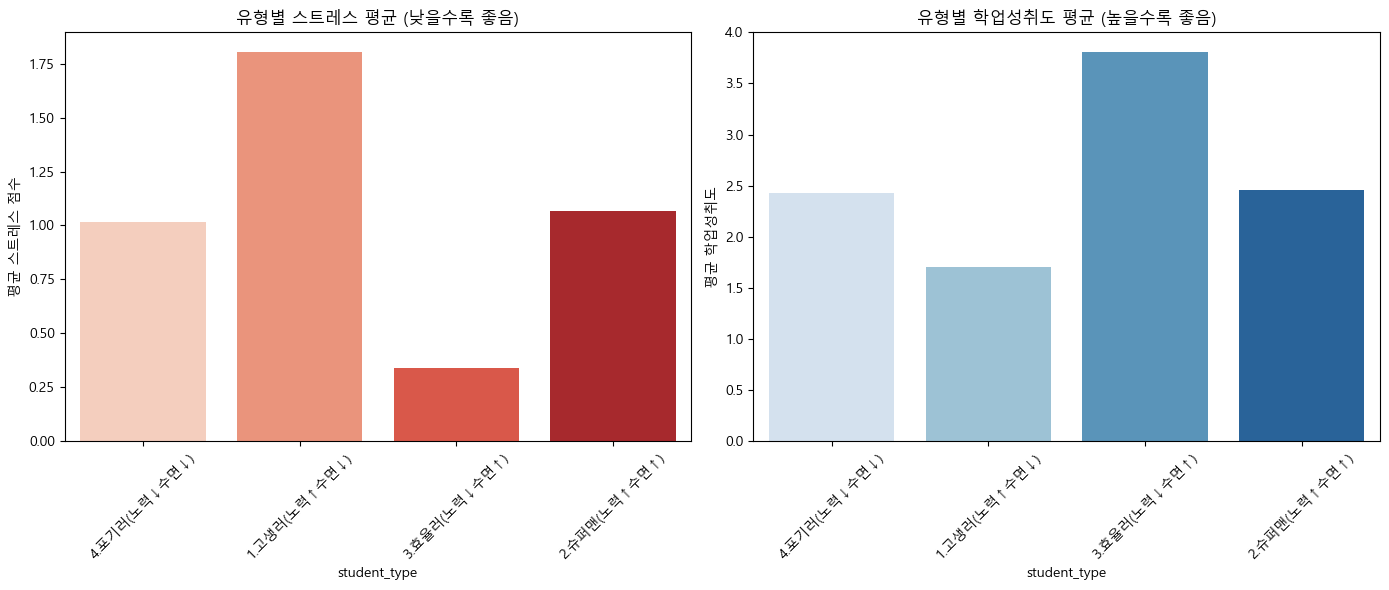

💡 인사이트: '고생러'는 '효율러'보다 스트레스는 훨씬 높지만, 성적 차이는 크지 않음(혹은 낮음)을 확인.


In [30]:
plt.figure(figsize=(14, 6))

# 왼쪽 그래프: 스트레스 비교
plt.subplot(1, 2, 1)
sns.barplot(x='student_type', y='스트레스', data=df, palette='Reds', errorbar=None)
plt.title('유형별 스트레스 평균 (낮을수록 좋음)')
plt.xticks(rotation=45)
plt.ylabel('평균 스트레스 점수')

# 오른쪽 그래프: 성적 비교
plt.subplot(1, 2, 2)
sns.barplot(x='student_type', y='학업성취도', data=df, palette='Blues', errorbar=None)
plt.title('유형별 학업성취도 평균 (높을수록 좋음)')
plt.xticks(rotation=45)
plt.ylabel('평균 학업성취도')

plt.tight_layout()
plt.show()

print("💡 인사이트: '고생러'는 '효율러'보다 스트레스는 훨씬 높지만, 성적 차이는 크지 않음(혹은 낮음)을 확인.")

####

In [4]:
def bin_by_median(series):
    med = series.median()
    return np.where(series <= med, "LOW", "HIGH")

# 핵심 축
df["부담_bin"] = bin_by_median(df["학업부담도"])

# 비교변수들(회복/성취/관계)
df["수면_bin"] = bin_by_median(df["수면질"])
df["삶_bin"]   = bin_by_median(df["삶의질"])
df["성취_bin"] = bin_by_median(df["학업성취도"])
df["지원_bin"] = bin_by_median(df["사회적지원"])
df["관계_bin"] = bin_by_median(df["교사-학생관계도"])

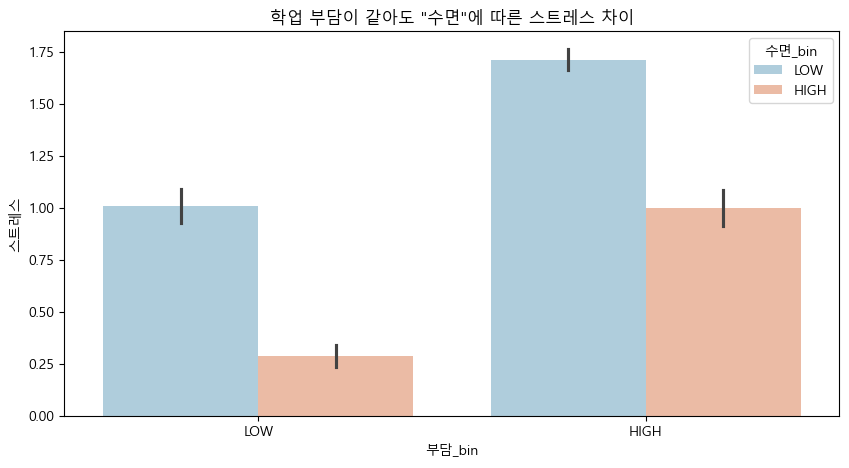

In [8]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "Malgun Gothic" 
plt.rcParams["axes.unicode_minus"] = False

plt.figure(figsize=(10, 5))
sns.barplot(x='부담_bin', y='스트레스', hue='수면_bin', data=df, palette='RdBu_r')
plt.title('학업 부담이 같아도 "수면"에 따른 스트레스 차이')

plt.show()

#### 상관관계 분석

스트레스에 영향을 주는 요인 가중치: 
스트레스            1.000000
total_effort    0.756427
괴롭힘             0.751162
진로고민도           0.742619
불안수준            0.736795
우울증             0.734379
두통              0.713484
과외정도            0.692977
압박감정도           0.690684
정신과병력           0.648644
학업부담도           0.634156
삶의질            -0.581723
사회적지원          -0.632497
교사-학생관계도       -0.680163
학업성취도          -0.720922
수면질            -0.749068
자존감            -0.756195
Name: 스트레스, dtype: float64


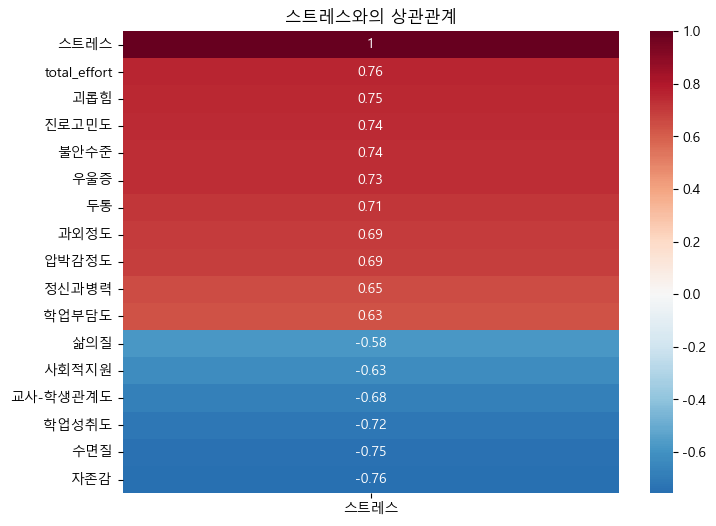

In [32]:
corr_mat = df.corr(numeric_only=True)

stress_fact = corr_mat['스트레스'].sort_values(ascending=False)

print("스트레스에 영향을 주는 요인 가중치: ")
print(stress_fact)

plt.figure(figsize = (8,6))
sns.heatmap(corr_mat[['스트레스']].sort_values(by='스트레스',ascending=False),
            annot = True, cmap = 'RdBu_r', center = 0)
plt.title('스트레스와의 상관관계')
plt.show()

#### 인사이트 도출
- total_effort(학업부담도+과외정도) 가 스트레스와 가장 강한 정비례 관계
    - 학업부담과 과외가 많을수록 스트레스가 많이 쌓인다.
- 스트레스를 낮추는 데에는 '자존감'과 '수면 질'이 가장 좋다.
    - 수면 코칭 및 스트레스 관리의 필요성
- 학업성취도와 스트레스는 강한 음의 상관관계를 가짐(-0.72)
    - 학업 성취도 향상을 위한 스트레스 관리 필요